In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [86]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
import pickle

In [87]:
df = pd.read_csv('/Users/sanghyun/Desktop/Coding/HalfMoon1008.github.io/PJ_DLflask/static/data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [88]:
df.shape

(1599, 12)

In [89]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [90]:
data = df.drop(columns=['quality']).copy()
target = df.quality.copy()

In [91]:
from sklearn import model_selection
train_data, test_data, train_target, test_target = model_selection.train_test_split(data, target,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [92]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

In [93]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [94]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=11, units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # elu or relu (or layers.ELU / layers.LeakyReLU)

model.add(layers.Dense(units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=32, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))
model.add(layers.Dropout(rate=0.4))

model.add(layers.Dense(units=1, activation=None))

In [97]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.mean_squared_error, 
              metrics=[metrics.mean_squared_error]) 

In [95]:
# Call-back 함수
# CheckPoint: Epoch 마다 validation 성능을 검증하여, best performance 일 경우 저장
CP = ModelCheckpoint(filepath='-{epoch:03d}-{loss:.4f}.hdf5',
            monitor='loss', verbose=1, save_best_only=True, mode='min')

# Learning Rate 줄여나가기
LR = ReduceLROnPlateau(monitor='loss',factor=0.8,patience=3, verbose=1, min_lr=1e-8)

CALLBACK = [CP, LR]

In [98]:
history = model.fit(x = train_data, y = train_target, batch_size=100, epochs=1000, shuffle=True, validation_split=0.3, verbose=0, callbacks=CALLBACK) 


Epoch 1: loss improved from inf to 1808.89001, saving model to -001-1808.8900.hdf5

Epoch 2: loss improved from 1808.89001 to 636.87183, saving model to -002-636.8718.hdf5

Epoch 3: loss improved from 636.87183 to 375.14255, saving model to -003-375.1425.hdf5

Epoch 4: loss improved from 375.14255 to 225.53069, saving model to -004-225.5307.hdf5

Epoch 5: loss improved from 225.53069 to 114.96127, saving model to -005-114.9613.hdf5

Epoch 6: loss improved from 114.96127 to 70.38914, saving model to -006-70.3891.hdf5

Epoch 7: loss improved from 70.38914 to 50.68829, saving model to -007-50.6883.hdf5

Epoch 8: loss improved from 50.68829 to 31.36706, saving model to -008-31.3671.hdf5

Epoch 9: loss improved from 31.36706 to 22.55178, saving model to -009-22.5518.hdf5

Epoch 10: loss improved from 22.55178 to 20.02161, saving model to -010-20.0216.hdf5

Epoch 11: loss improved from 20.02161 to 14.91254, saving model to -011-14.9125.hdf5

Epoch 12: loss improved from 14.91254 to 9.74141,

In [102]:
model.load_weights("-426-2.1190.hdf5")

In [103]:
result = model.evaluate(test_data, test_target)

print('loss (mean_squared_error) :', result[0])

15/15 [==============================] - 0s 7ms/step - loss: 0.7891 - mean_squared_error: 0.7891
loss (mean_squared_error) : 0.7891499400138855


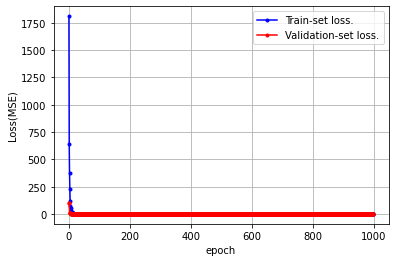

In [119]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

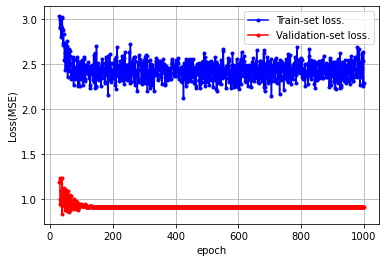

In [120]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len[30:], loss[30:], marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len[30:], val_loss[30:], marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

In [112]:
# Prediction on test data
model.predict(test_data)

15/15 [==============================] - 0s 4ms/step


array([[5.317127 ],
       [4.2056193],
       [5.88164  ],
       [5.255739 ],
       [5.7854543],
       [4.4337378],
       [5.117308 ],
       [5.452603 ],
       [5.028292 ],
       [4.8866477],
       [4.9437666],
       [5.4184628],
       [4.9757547],
       [4.892738 ],
       [5.1341386],
       [5.7836933],
       [5.691973 ],
       [5.181391 ],
       [6.3247347],
       [4.2225604],
       [5.3529835],
       [5.1844063],
       [5.520119 ],
       [2.4292061],
       [4.725983 ],
       [5.095716 ],
       [4.5708923],
       [5.892034 ],
       [4.7618494],
       [6.4852276],
       [5.491072 ],
       [4.8602195],
       [4.9797697],
       [5.050787 ],
       [6.138873 ],
       [5.4551826],
       [4.644616 ],
       [4.7602725],
       [6.2279787],
       [4.90844  ],
       [5.613309 ],
       [4.035181 ],
       [5.108569 ],
       [6.2871   ],
       [5.44541  ],
       [4.570263 ],
       [4.9607983],
       [4.9197907],
       [5.24674  ],
       [5.037509 ],


In [113]:
sample_data = np.array([[7.9, 0.52, 0.26, 2.2, 0.79, 14, 38, 0.99, 3.31, 0.62, 10.2]])

In [114]:
model.predict(sample_data)

1/1 [==============================] - 0s 16ms/step


array([[5.036232]], dtype=float32)